In [1]:
import matplotlib as plt 
import numpy as np
import random
import copy
import itertools
from random import sample
from itertools import combinations

In [10]:
def floydWarshall(nodes,graph):
    dist=copy.deepcopy(graph)
    for k in range(nodes):
        for i in range(nodes):
            for j in range(nodes):
                dist[i][j] = min(dist[i][j] , dist[i][k]+ dist[k][j])
    return dist

def MSE(graphList,M_SPD,m):
    #these are m graphs and varies
    t = (SPD(graphList,m)-M_SPD)
    return t*t

def SPD(graphList,M): 
    nodes=len(graphList[0])
    edges=(nodes*(nodes-1))
    dic=[{} for x in range(edges)]
    for g in graphList:
        for i in range(0,len(g)):
            for j in range(0,len(g[0])):
                if(i<j):
                    x=0
                    if(g[i][j] in dic[i*j+j].keys()):
                        x=dic[i*j+j][g[i][j]]
                    dic[i*j+j][g[i][j]]=x+1
    ans = 0
    for G in graphList:
        P=1
        for i in range(0,len(G)):
            for j in range(0,len(G[0])):
                if(i<j):
                    P*=(dic[i*j+j][G[i][j]]/M)
        ans+=(P*SPDbar(G))
    return ans
    

def SPDbar(graph):
    V = len(graph)
    dist = floydWarshall(V,graph)
    sum = 0
    for i in range(V):
        for j in range(V):
            if(i!=j):
                sum+=dist[i][j]
    #divided by 2 due to symmetry counting was extra
    return (1/(V*(V-1)))*(sum/2)

In [11]:
nodes=5
graph=[[0]*nodes for i in range(0,nodes)]
edges=(nodes*(nodes-1))//2

In [14]:
y_axis=[]
x_axis=[]
edge_weights=[np.random.rand(2) for i in range(0,edges)]
#Edge weights for all possible graphs
result = list(itertools.product(*edge_weights))
M=len(result)
edge=sample(list(combinations(range(0,nodes),2)),edges)

total_graph=[]
for i in range(M):
    x=copy.deepcopy(graph)
    k=0
    for (a,b) in edge:
        x[a][b]=round(result[i][k],2)
        x[b][a]=round(result[i][k],2)
        k+=1
    total_graph.append(x)

for m in [3,20,40,60,80,100,1000]:
    x_axis.append(m)
    #Values of edge weights for m graphs out of M possible graphs
    g_graph=[result[i] for i in random.sample(range(0, M), m)]

    m_graph=[]
    for i in range(m):
        x=copy.deepcopy(graph)
        k=0
        for (a,b) in edge:
            x[a][b]=round(g_graph[i][k],2)
            x[b][a]=round(g_graph[i][k],2)
            k+=1
        m_graph.append(x)
    M_SPD = SPD(total_graph,M)
    y_axis.append(MSE(m_graph,M_SPD,M))

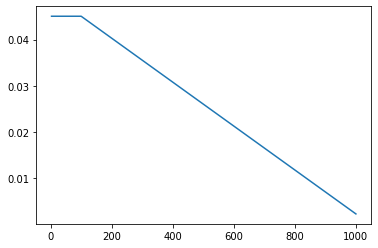

In [15]:
import matplotlib.pyplot as plt

plt.plot(x_axis,y_axis)
plt.show()

In [82]:
M

1024